In [150]:
# -*- coding: utf-8 -*-
"""
Created on Sat Nov 17 13:21:25 2018
@author: Ken

Modified by MinhKhang Nguyen
July 09 2020 3:04 PM
"""

'\nCreated on Sat Nov 17 13:21:25 2018\n@author: Ken\n\nModified by MinhKhang Nguyen\nJuly 09 2020 3:04 PM\n'

In [1]:
import pandas as pd 
import random as rnd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
gdf = pd.read_csv('regssdatacsv.csv')

In [3]:
gdf.columns

Index(['Row', 'Tm', 'Game', 'Date', 'Home/Away', 'Opp', 'Result', 'TeamPTS',
       'OpponentPTS', 'TeamFG', 'TeamFGA', 'TeamFGP', 'Team3P', 'Team3PA',
       'Team3PP', 'TeamFT', 'TeamFTA', 'TeamFTP', 'OpponentFG', 'OpponentFGA',
       'OpponentFGP', 'Opponent3P', 'Opponent3PA', 'Opponent3PP', 'OpponentFT',
       'OpponentFTA', 'OpponentFTP'],
      dtype='object')

In [4]:
PHIdf = gdf[gdf.Tm == 'PHI']
HOUdf = gdf[gdf.Tm == 'HOU']


In [5]:
PHIdf.Date = PHIdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
PHIdf = PHIdf[(PHIdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore')) & (PHIdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]

HOUdf.Date = HOUdf.Date.apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='ignore'))
HOUdf = HOUdf[(HOUdf['Date'] > pd.to_datetime('20191022', format='%Y%m%d', errors='ignore'))& (HOUdf['Date'] <= pd.to_datetime('20200311', format='%Y%m%d', errors='ignore'))]


C:\Users\Home\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


TypeError: '>' not supported between instances of 'str' and 'Timestamp'

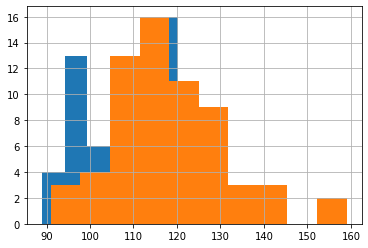

In [6]:
PHIdf.TeamPTS.hist()
HOUdf.TeamPTS.hist()

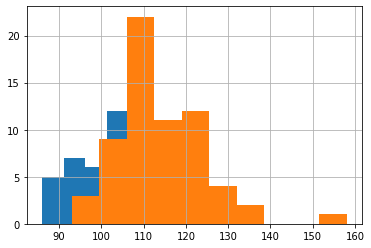

In [7]:
PHIdf.OpponentPTS.hist()
HOUdf.OpponentPTS.hist()

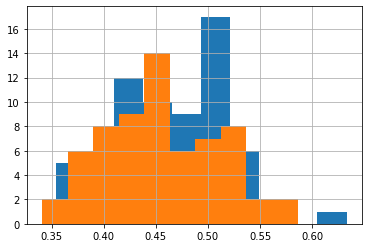

In [8]:
PHIdf.TeamFGP.hist()
HOUdf.TeamFGP.hist()

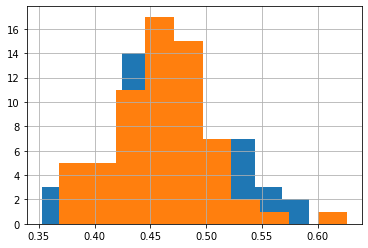

In [9]:
PHIdf.OpponentFGP.hist()
HOUdf.OpponentFGP.hist()

In [10]:
PHImeanpts = PHIdf.TeamPTS.mean()
HOUmeanpts = HOUdf.TeamPTS.mean()
PHIfgp = PHIdf.TeamFGP.mean()
HOUfgp = HOUdf.TeamFGP.mean()
PHIsdpts = PHIdf.TeamPTS.std()
HOUsdpts = HOUdf.TeamPTS.std()

PHImeaHOUp = PHIdf.OpponentPTS.mean()
HOUmeaHOUp = HOUdf.OpponentPTS.mean()
PHIfgpopp = PHIdf.OpponentFGP.mean()
HOUfgpopp = HOUdf.OpponentFGP.mean()
PHIsdopp = PHIdf.OpponentPTS.std()
HOUsdopp = HOUdf.OpponentPTS.std()

print("PHI Mean ", PHImeanpts)
print("PHI FG% ", PHIfgp)
print("PHI Points Standard Deviation ", PHIsdpts)
print("HOU Points Mean ", HOUmeanpts)
print("HOU FG% ", HOUfgp)
print("HOU Points Standard Deviation ", HOUsdpts)

print("PHI OppPoints Mean ", PHImeaHOUp)
print("PHI OppFG% Mean ", PHIfgpopp)
print("PHI OppPoints SD ", PHIsdopp)
print("HOU OppPoints Mean ", HOUmeaHOUp)
print("HOU OppFG% Mean ", HOUfgpopp)
print("HOU OppPoints SD ", HOUsdopp)

PHI Mean  109.58461538461539
PHI FG%  0.46556923076923085
PHI Points Standard Deviation  11.309415750399515
HOU Points Mean  118.125
HOU FG%  0.454703125
HOU Points Standard Deviation  13.148118339633845
PHI OppPoints Mean  107.36923076923077
PHI OppFG% Mean  0.4641384615384616
PHI OppPoints SD  10.945274709276989
HOU OppPoints Mean  114.375
HOU OppFG% Mean  0.4629218749999998
HOU OppPoints SD  10.618193431372012


In [11]:
def gameSim():
    PHIScore = (rnd.gauss(PHImeanpts,PHIsdpts)+ rnd.gauss(HOUmeaHOUp,HOUsdopp))/2
    HOUScore = (rnd.gauss(HOUmeanpts,HOUsdpts)+ rnd.gauss(HOUmeaHOUp,HOUsdopp))/2
    if int(round(PHIScore)) > int(round(HOUScore)):
        return 1
    elif int(round(PHIScore)) < int(round(HOUScore)):
        return -1
    else: return 0

In [12]:
def gAmesSim(ns):
    gamesout = []
    team1win = 0
    team2win = 0
    for i in range(ns):
        gm = gameSim()
        gamesout.append(gm)
        if gm == 1:
            team1win +=1 
        elif gm == -1:
            team2win +=1
    print('PHI Win ', team1win/(team1win+team2win),'%')
    print('HOU Win ', team2win/(team1win+team2win),'%')
    return gamesout
        

In [13]:
gAmesSim(10000)

PHI Win  0.3504079314262109 %
HOU Win  0.6495920685737891 %


[-1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 -1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 0,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 0,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 0,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 0,
 -1,
 -1,
 0,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 0,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 1,
 -1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 1,
 -1,